In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import cv2 as cv  
import matplotlib.pyplot as plt
from tensorflow.python.keras.metrics import accuracy

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test,y_test)=mnist.load_data()# split the data in training set as tuple

x_train = tf.keras.utils.normalize(x_train , axis = 1)
x_test = tf.keras.utils.normalize(x_test , axis = 1)

model= tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(units=128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=10,activation=tf.nn.softmax))
model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=10, epochs=4)#As the number of epochs increases beyond 11,chance of overfitting of the model on training data

loss , accuracy  =model.evaluate(x_test,y_test)
print(accuracy)
print(loss)


Epoch 1/4
6000/6000 [==============================] - 15s 2ms/step - loss: 0.2367 - accuracy: 0.9283
Epoch 2/4
6000/6000 [==============================] - 14s 2ms/step - loss: 0.1154 - accuracy: 0.9649
Epoch 3/4
6000/6000 [==============================] - 14s 2ms/step - loss: 0.0830 - accuracy: 0.9749
Epoch 4/4
313/313 [==============================] - 1s 2ms/step - loss: 0.1048 - accuracy: 0.9716
0.9715999960899353
0.10483067482709885


----------------
The predicted value is :  4
----------------


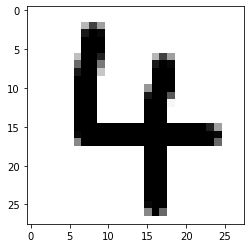

----------------
The predicted value is :  3
----------------


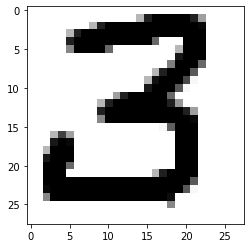

----------------
The predicted value is :  2
----------------


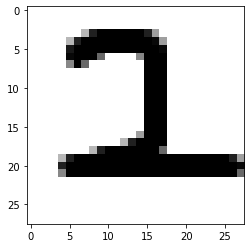

----------------
The predicted value is :  0
----------------


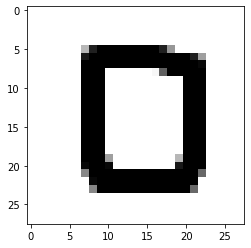

In [ ]:
for x in range(1, 5):
    # now we are going to read images it with open cv
    #img = cv.imread('7.png')[:, :, 0]
    img = cv.imread(f'{x}.png')[:, :, 0]  # all of it and 1st and last one
    img = np.invert(np.array([img]))  # invert black to white in images so that model wont get confues
    prediction = model.predict(img)
    print("----------------")
    print("The predicted value is : ", np.argmax(prediction))
    print("----------------")
    plt.imshow(img[0], cmap=plt.cm.binary)  # change the color in black and white
    plt.show()